In [194]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

Загрузка данных

In [190]:
submission = pd.read_csv('F:/gender_submission.csv')
train = pd.read_csv('F:/train.csv')
test = pd.read_csv('F:/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Выбираем нужные столбцы

In [ ]:
X = train.drop(['PassengerId', 'Survived', 'Pclass','Name', 'Ticket', 'Cabin'], axis = 1)
XX = test.drop(['PassengerId', 'Pclass','Name', 'Ticket', 'Cabin'], axis = 1)
y = train.Survived

""""Из символьных категорилальных данных формеруем в численные категориальные"""
X = pd.get_dummies(X)
XX = pd.get_dummies(XX)


Обучение модели

In [184]:
clf = DecisionTreeClassifier(criterion = 'entropy')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 41) 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

0.7877094972067039

Применение обученной модели на невиданных для неё данных

In [186]:
df = pd.DataFrame()
for i in range(1, 100):
    clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = i)
    clf.fit(X_train, y_train)
    result = pd.DataFrame({'max_depth' : [i], 'train_value': [clf.score(X_train, y_train)], 'test_value' : [clf.score(X_test, y_test)], 'predict_value' : [clf.score(XX, yy_pred)]})
    df = pd.concat([df, result])

df.head()

,max_depth,train_value,test_value,predict_value
0,1,0.773876,0.837989,0.763158
0,2,0.773876,0.837989,0.763158
0,3,0.799157,0.860335,0.779904
0,4,0.820225,0.871508,0.791866
0,5,0.820225,0.871508,0.791866


<Axes: xlabel='max_depth', ylabel='score'>

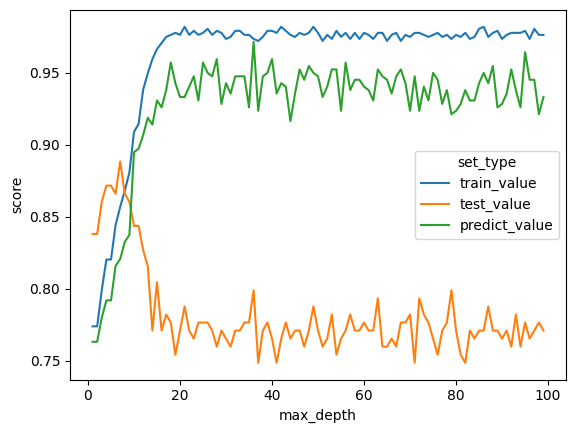

In [189]:
score_data = pd.melt(df, id_vars = ['max_depth'], value_vars= ['train_value', 'test_value', 'predict_value'], var_name = 'set_type', value_name='score')
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = score_data)

In [196]:
data_survived = pd.DataFrame({'id_Passanger': test.PassengerId, 'Name': test.Name, 'Survived': clf.predict(XX)})
data_survived.Survived = np.where(data_survived.Survived != 0, 'Да', 'Нет')
data_survived

,id_Passanger,Name,Survived
0,892,"Kelly, Mr. James",Нет
1,893,"Wilkes, Mrs. James (Ellen Needs)",Да
2,894,"Myles, Mr. Thomas Francis",Нет
3,895,"Wirz, Mr. Albert",Нет
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Нет
...,...,...,...
413,1305,"Spector, Mr. Woolf",Нет
414,1306,"Oliva y Ocana, Dona. Fermina",Да
415,1307,"Saether, Mr. Simon Sivertsen",Нет
416,1308,"Ware, Mr. Frederick",Нет
